In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (silhouette_score,
                             accuracy_score,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay
                             )

In [56]:
df = pd.read_csv("bank_transactions.csv")

In [57]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df = df.dropna(subset=['CustomerID'])

In [7]:
df = df.drop_duplicates()

In [8]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df.shape

(401604, 8)

In [10]:
df['InvoiceNo']

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 401604, dtype: object

In [11]:
df['InvoiceNo'].value_counts()

InvoiceNo
576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C566782      1
C566779      1
C566775      1
C540156      1
C540152      1
Name: count, Length: 22190, dtype: int64

In [12]:
df = df[~df['InvoiceNo'].str.contains('C', na=False)]

In [13]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [14]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [15]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [16]:
df['Total_Price'] = df['Quantity'] * df['UnitPrice']

In [17]:
df['Total_Price']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Total_Price, Length: 392732, dtype: float64

In [18]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [19]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 392732, dtype: datetime64[ns]

In [40]:
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df.groupby("CustomerID").agg({
    "InvoiceDate" : lambda x: (snapshot_date - x.max()).days, # Recency
    "InvoiceNo" : "nunique",                                     # Frequency
    "Total_Price" : "sum"                                     # Monetary
})

rfm_log = np.log1p(rfm)
rfm

,InvoiceDate,InvoiceNo,Total_Price
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05


In [21]:
rfm_scale = StandardScaler().fit_transform(rfm_log)
pca = PCA(n_components=3)
rfm_pca_label = pca.fit_transform(rfm_scale)

In [22]:
pca.explained_variance_ratio_

array([0.74982381, 0.18846673, 0.06170946])

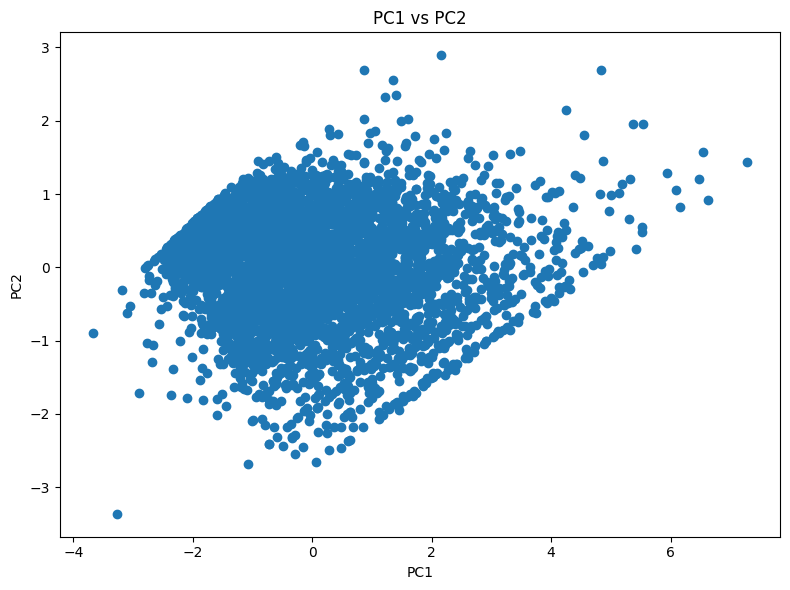

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(rfm_pca_label[:, 0], rfm_pca_label[:, 1])
plt.title('PC1 vs PC2')
plt.xlabel(f'PC1')
plt.ylabel(f'PC2')
plt.tight_layout()
plt.show()

In [24]:
fig = px.scatter_3d(x=rfm_pca_label[:,0], 
                    y=rfm_pca_label[:,1], 
                    z=rfm_pca_label[:,2],)
fig.show()

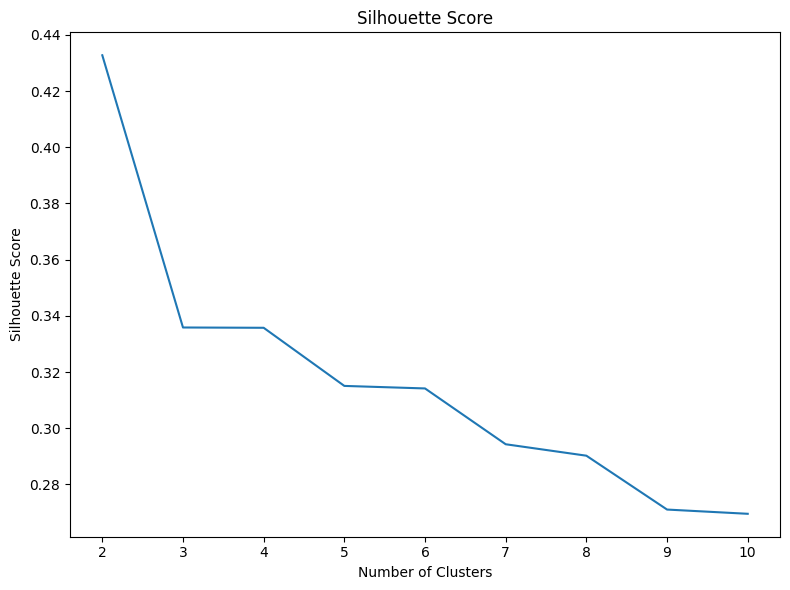

In [25]:
scores = []

for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    km_label = km.fit_predict(rfm_pca_label)
    score = silhouette_score(rfm_pca_label, km.labels_)

    scores.append(score)

plt.figure(figsize=(8,6))
plt.plot(range(2,11), scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

In [26]:
kmm = KMeans(n_clusters=4, random_state=42)
kmm_label = kmm.fit_predict(rfm_pca_label)
rfm['Cluster'] = kmm_label

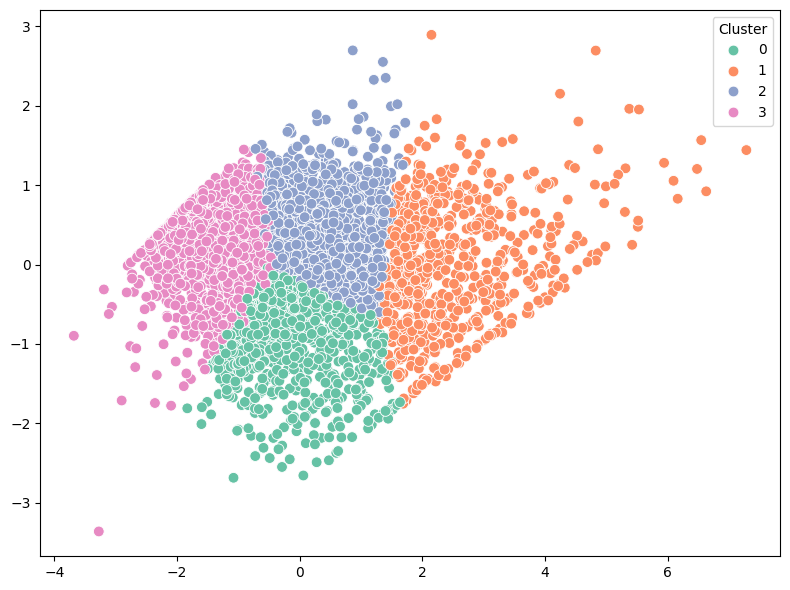

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = rfm_pca_label[:,0],
            y = rfm_pca_label[:,1],
            hue = rfm['Cluster'], 
            palette='Set2', 
            s=60)
plt.tight_layout()
plt.show()

In [28]:
fig = px.scatter_3d(x=rfm_pca_label[:,0],
                    y=rfm_pca_label[:,1],
                    z=rfm_pca_label[:,2],
                    color=rfm['Cluster'])
fig.show()

In [29]:
rfm = rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Total_Price': 'Monetary'
})

In [30]:
x = rfm[['Recency','Frequency','Monetary']]
y = rfm["Cluster"]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
rf = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42)
rf.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [33]:
y_pred = rf.predict(x_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       144
           1       0.99      1.00      1.00       162
           2       0.99      0.98      0.98       247
           3       0.98      0.99      0.99       315

    accuracy                           0.99       868
   macro avg       0.99      0.99      0.99       868
weighted avg       0.99      0.99      0.99       868



In [35]:
accuracy_score(y_test,y_pred)*100

98.61751152073732

In [55]:
group = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm)
    group.append([i, kmeans.inertia_])
groups = pd.DataFrame(group, columns = ['number_of_group', 'inertia'])
groups

,number_of_group,inertia
0,1,3.501928e+11
1,2,1.178680e+11
2,3,5.543488e+10
3,4,3.776537e+10
4,5,2.231378e+10
5,6,1.662264e+10
6,7,1.081400e+10
7,8,7.225543e+09
8,9,5.581484e+09


In [48]:
rfm.agg(['mean'])

,InvoiceDate,InvoiceNo,Total_Price
mean,92.518322,4.271952,2048.215924


In [52]:
print((rfm.value_counts(normalize = True, sort = True) * 100).to_string())

InvoiceDate  InvoiceNo  Total_Price
1            1          227.390        0.023047
                        360.000        0.023047
                        848.550        0.023047
             2          252.490        0.023047
                        326.750        0.023047
                        347.750        0.023047
                        563.230        0.023047
                        984.570        0.023047
                        1239.380       0.023047
                        168472.500     0.023047
             3          563.940        0.023047
                        640.760        0.023047
                        815.770        0.023047
                        961.490        0.023047
                        1031.410       0.023047
                        1071.730       0.023047
                        1316.660       0.023047
             4          728.020        0.023047
                        862.810        0.023047
                        1010.350       0.023047
    

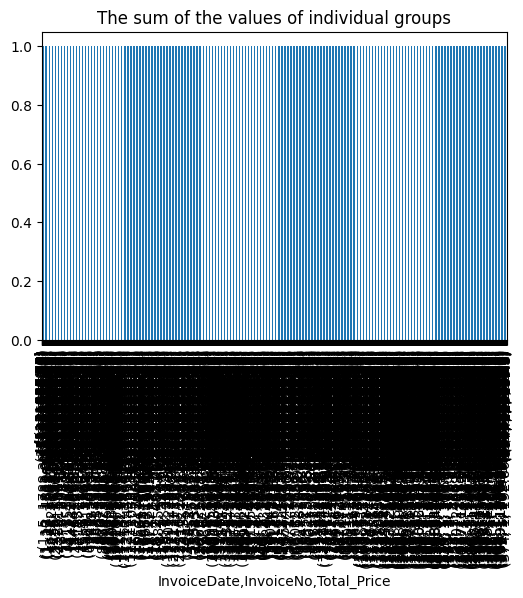

In [54]:
rfm.value_counts().plot(kind='bar', figsize=(6,4), title='The sum of the values of individual groups')